# DS-SF-32 | Homework 02: The `pandas` Library

In this homework, we will be exploring the `police shootings` dataset using `pandas`.

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
os.chdir(r"C:\Users\aaharrison\Desktop\Repositories\DS-SF-32\DS-SF-32\dataset")
df = pd.read_csv('police-killings.csv', encoding='latin-1', index_col = 0)

#### A) Starter question: Display a few lines of the dataset to the screen.

In [13]:
df.head()

,name,age,gender,raceethnicity,month,day,year,streetaddress,city,state,lawenforcementagency,cause,armed,county_income
0,A'donte Washington,16,Male,Black,February,23,2015,Clearview Ln,Millbrook,AL,Millbrook Police Department,Gunshot,No,54766
1,Aaron Rutledge,27,Male,White,April,2,2015,300 block Iris Park Dr,Pineville,LA,Rapides Parish Sheriff's Office,Gunshot,No,40930
2,Aaron Siler,26,Male,White,March,14,2015,22nd Ave and 56th St,Kenosha,WI,Kenosha Police Department,Gunshot,No,54930
3,Aaron Valdez,25,Male,Hispanic/Latino,March,11,2015,3000 Seminole Ave,South Gate,CA,South Gate Police Department,Gunshot,Firearm,55909
4,Adam Jovicic,29,Male,White,March,19,2015,364 Hiwood Ave,Munroe Falls,OH,Kent Police Department,Gunshot,No,49669



#### 1. Make the following changed to column names:

+ lawenforcementagency -> agency
+ raceethnicity        -> race


In [15]:
df.columns = ['name', 'age', 'gender', 'race', 'month', 'day', 'year',
       'streetaddress', 'city', 'state', 'agency', 'cause',
       'armed', 'county_income']


#### 2. Show the count of missing values in each column


In [27]:
for x in df.columns:
    try:
        print(x, len(df[pd.isnull(df[x])]))
    except:
        pass

name 0
age 0
gender 0
race 0
month 0
day 0
year 0
streetaddress 4
city 0
state 0
agency 0
cause 0
armed 0
county_income 0


#### 3. replace each null value in the dataframe with the string "Unknown"

In [29]:
df.fillna("Unknown", inplace = True)

#### 4. How many killings were there so far in 2015?

In [33]:
df[df["year"] == 2015]["name"].count()

467

#### 5. Of all killings, how many were male and how many female?

In [35]:
df["gender"].value_counts()

Male      445
Female     22
Name: gender, dtype: int64

#### 6. How many killings were of unarmed people?


In [40]:
df[df["armed"] == "No"]["name"].count()

102

#### 7. What percentage of all killings were unarmed?


In [42]:
df[df["armed"] == "No"]["name"].count()/ df["armed"].dropna().count()

0.21841541755888652

#### 8. What are the 5 states with the most killings?


In [45]:
df["state"].value_counts()[:5]

CA    74
TX    46
FL    29
AZ    25
OK    22
Name: state, dtype: int64

#### 9. Show a value counts of deaths for each race


In [46]:
df["race"].value_counts()

White                     236
Black                     135
Hispanic/Latino            67
Unknown                    15
Asian/Pacific Islander     10
Native American             4
Name: race, dtype: int64

#### 10. Display a histogram of ages of all killings


//anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


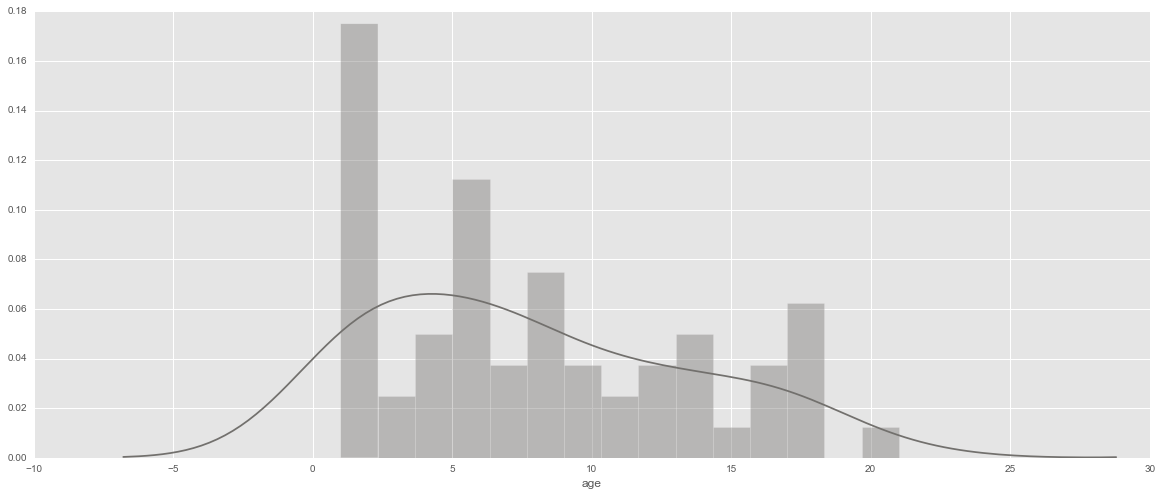

In [95]:
plt.figure(figsize = (20,8))
import seaborn as sns
sns.distplot(df["age"].value_counts(), bins = 15, color = "#72706d")

In [55]:
df["race"].unique()

array(['Black', 'White', 'Hispanic/Latino', 'Unknown',
       'Asian/Pacific Islander', 'Native American'], dtype=object)

#### 11. Show 6 histograms of ages by race


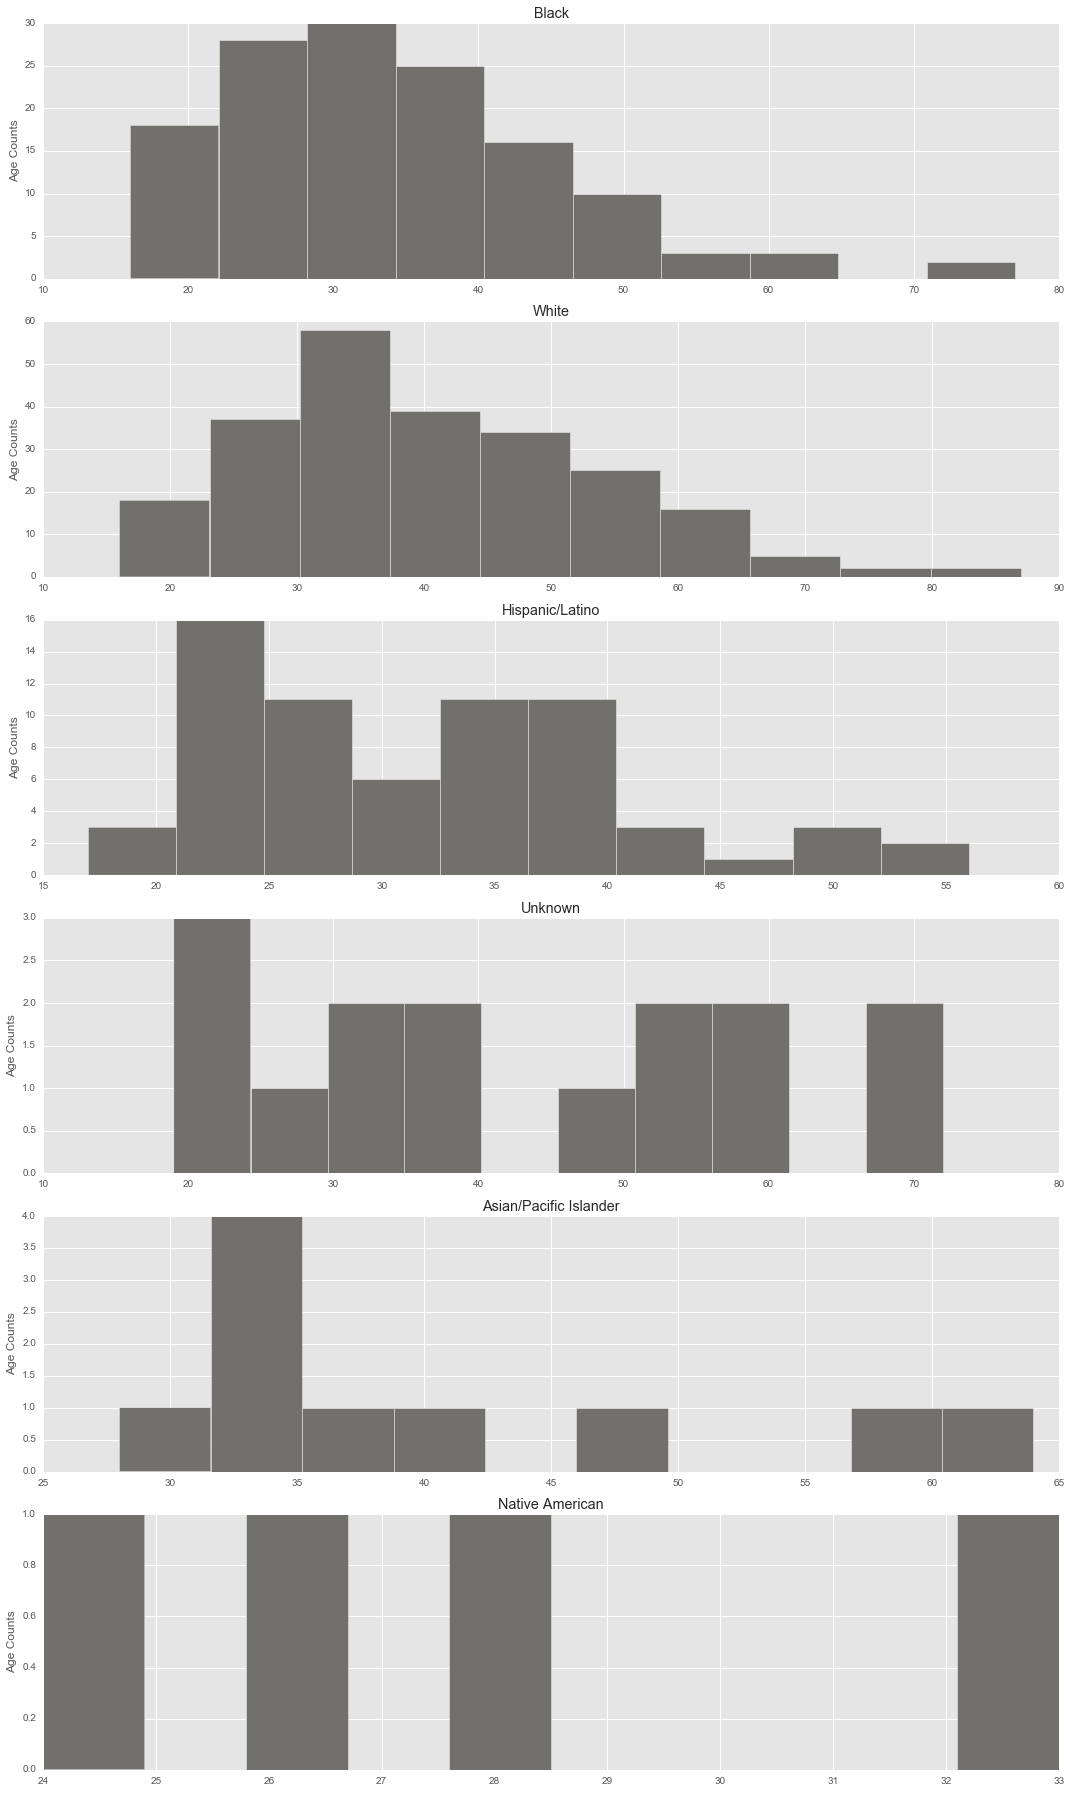

In [76]:
plt.style.use("ggplot")
fig, axes = plt.subplots(figsize = (15,25), nrows = 6, ncols = 1)
num = 0
for x in df["race"].unique().tolist():
    axes[num].hist(df[df["race"] == x]["age"], color = "#72706d")
    axes[num].set_title(x)
    axes[num].set_ylabel("Age Counts")
    num+=1
fig.tight_layout()

#### 12. What is the average age of death by race?


In [78]:
[np.mean(df[df["race"] == x]["age"].dropna()) for x in df["race"].unique().tolist()]

[34.044444444444444,
 40.466101694915253,
 31.71641791044776,
 43.533333333333331,
 40.799999999999997,
 27.75]

In [79]:
for x in df["race"].unique().tolist():
    print(x, ": ", np.mean(df[df["race"] == x]["age"].dropna()))

Black :  34.0444444444
White :  40.4661016949
Hispanic/Latino :  31.7164179104
Unknown :  43.5333333333
Asian/Pacific Islander :  40.8
Native American :  27.75


#### 13. Show a bar chart with counts of deaths every month


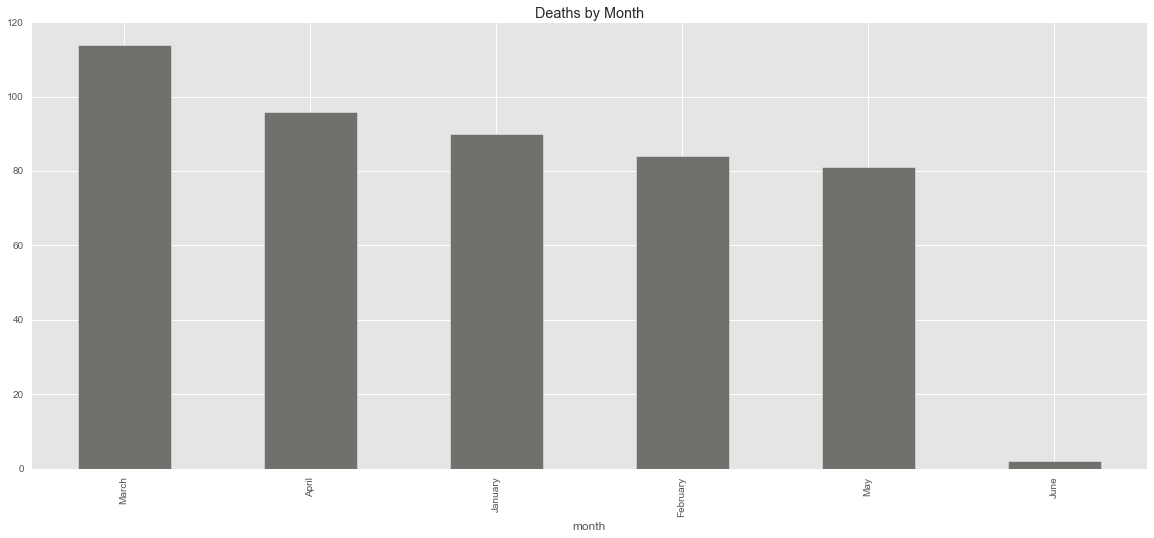

In [92]:
plt.figure(figsize = (20,8))
df.groupby("month")["name"].count().sort_values(ascending = False).plot(
    kind = "bar", title = "Deaths by Month", color = "#72706d")